In [1]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("Data/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [2]:
df.Result.value_counts()

Result
1    81
0    72
Name: count, dtype: int64

In [3]:
df.columns

Index(['Month', 'Day', 'Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [4]:
cols = ['Solar.R', 'Wind', 'Temp']
x = df[cols]
y = df.Result

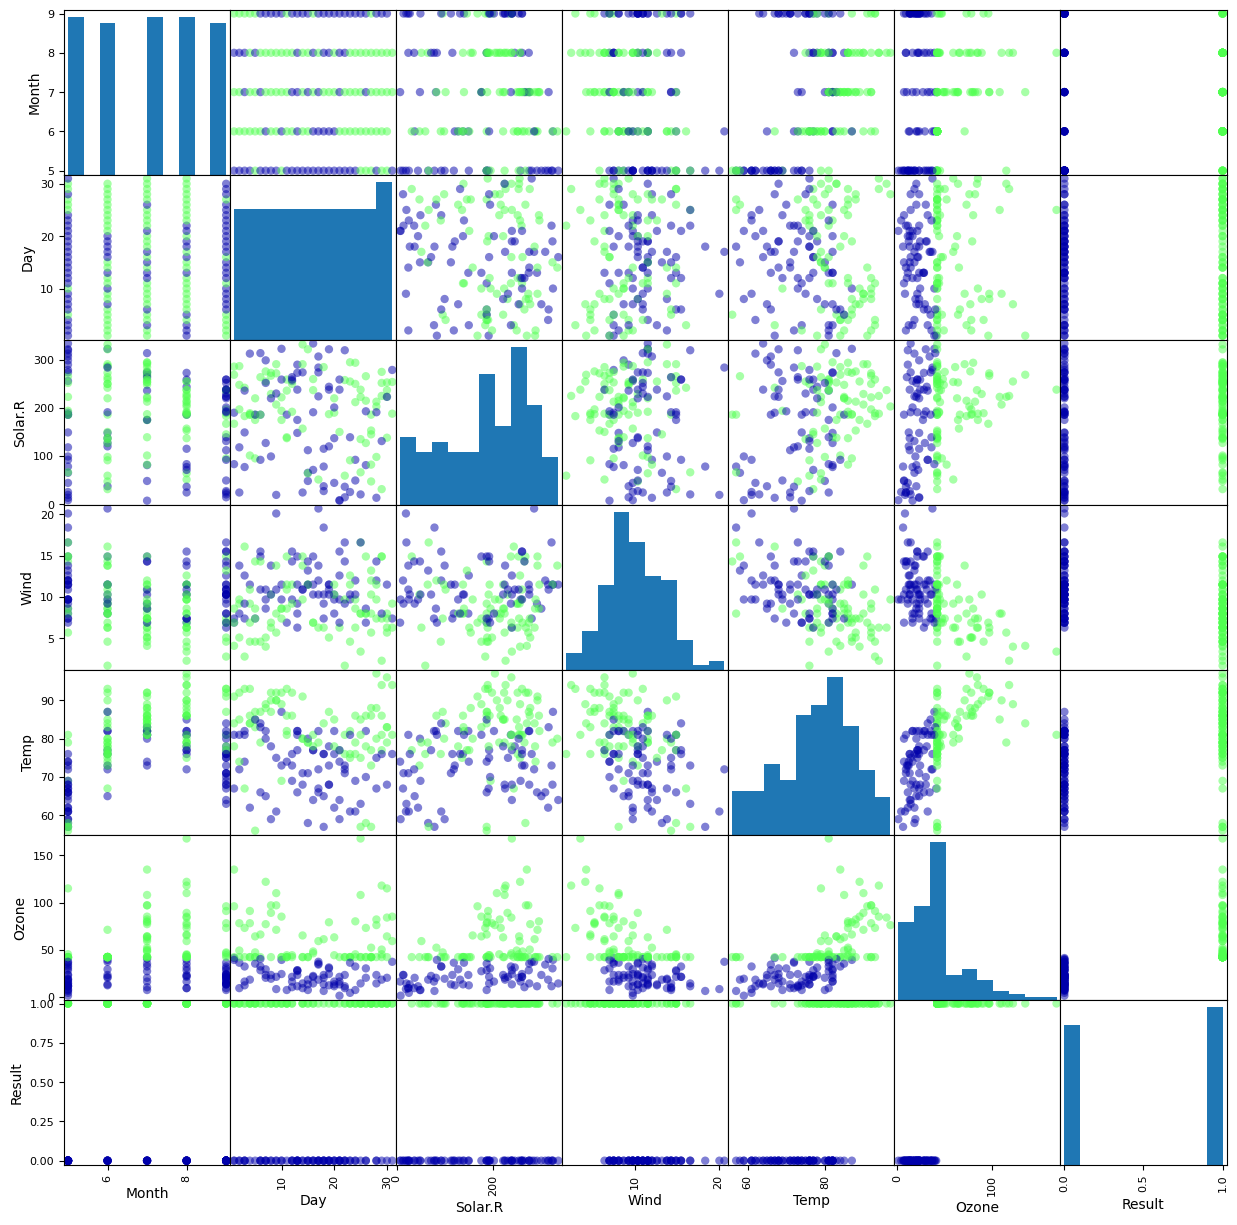

In [5]:
import matplotlib.pyplot as plt
import mglearn

pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)
plt.show()

In [7]:
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(x,y)
x_sample, type(x_sample)

(        Solar.R  Wind  Temp
 0    190.000000   7.4    67
 1    118.000000   8.0    72
 2    149.000000  12.6    74
 3    313.000000  11.5    62
 5    185.931507  14.9    66
 ..          ...   ...   ...
 85   223.000000   8.0    85
 76   260.000000   6.9    81
 115  212.000000   9.7    79
 102  137.000000  11.5    86
 36   264.000000  14.3    79
 
 [144 rows x 3 columns],
 pandas.core.frame.DataFrame)

In [9]:
x_samp = pd.DataFrame(data=x_sample, columns = cols)
y_samp = pd.DataFrame(data=y_sample, columns = ['Result'])
df_samp = pd.concat([x_samp, y_samp], axis = 1)

In [11]:
x_samp, type(x_samp)

(        Solar.R  Wind  Temp
 0    190.000000   7.4    67
 1    118.000000   8.0    72
 2    149.000000  12.6    74
 3    313.000000  11.5    62
 5    185.931507  14.9    66
 ..          ...   ...   ...
 85   223.000000   8.0    85
 76   260.000000   6.9    81
 115  212.000000   9.7    79
 102  137.000000  11.5    86
 36   264.000000  14.3    79
 
 [144 rows x 3 columns],
 pandas.core.frame.DataFrame)

In [12]:
x = x_samp[cols]
y = y_samp['Result']

In [13]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=10)

In [14]:
from sklearn.svm import SVC
import numpy as np

model = SVC(random_state = 10)
model.fit(x_tr, y_tr)
pred = model.predict(x_ts)
print('학습용: ', model.score(x_tr, y_tr))
print('검증용: ', model.score(x_ts, y_ts))


학습용:  0.6347826086956522
검증용:  0.6896551724137931


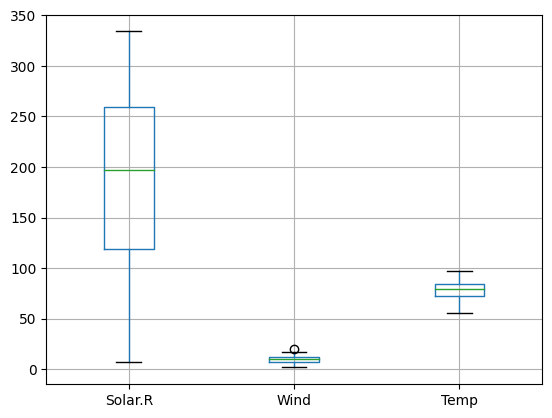

In [15]:
x_tr.boxplot()
plt.show()

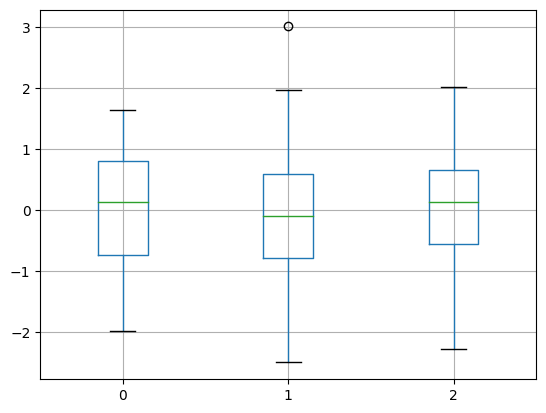

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_tr)
x_tr_scaled = pd.DataFrame(ss.transform(x_tr))
x_ts_scaled = pd.DataFrame(ss.transform(x_ts))
x_tr_scaled.boxplot()
plt.show()

In [18]:
model = SVC(random_state = 10)
model.fit(x_tr_scaled, y_tr)
pred = model.predict(x_ts)
print('학습용: ', model.score(x_tr_scaled, y_tr))
print('검증용: ', model.score(x_ts_scaled, y_ts))

학습용:  0.7391304347826086
검증용:  0.8620689655172413


c:\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [19]:
tr_rate, ts_rate = [], []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        model = SVC(C=n, gamma=g, random_state = 10)
        model.fit(x_tr_scaled, y_tr)
        tr_rate.append([n, g, model.score(x_tr_scaled, y_tr)])
        ts_rate.append([n, g, model.score(x_ts_scaled, y_ts)])

In [22]:
train_arr = np.array(tr_rate)
test_arr = np.array(ts_rate)
max_rate = np.max(test_arr[:,2])
idx = np.where(test_arr[:,2] == max_rate)[0][0]
print('최적의 c: ', ts_rate[idx][0])
print("최적의 gamma:",ts_rate[idx][1])
print("최적의 정확도:",ts_rate[idx][2])   

최적의 c:  1
최적의 gamma: 0.1
최적의 정확도: 0.8620689655172413


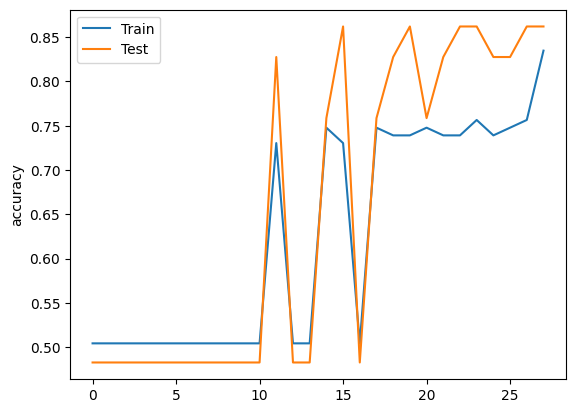

In [23]:
plt.plot(range(len(tr_rate)), train_arr[:,2], label="Train")
plt.plot(range(len(ts_rate)), test_arr[:,2], label="Test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [27]:
# 최적 모형
model = SVC(C=100, gamma = 0.01, random_state = 10)
model.fit(x_tr_scaled, y_tr)
print('학습용: ', model.score(x_tr_scaled, y_tr))
print('검증용: ', model.score(x_ts_scaled, y_ts))

학습용:  0.7391304347826086
검증용:  0.8620689655172413


In [24]:
# 최적 모형
model = SVC(C=1, gamma = 0.1, random_state = 10)
model.fit(x_tr_scaled, y_tr)
print('학습용: ', model.score(x_tr_scaled, y_tr))
print('검증용: ', model.score(x_ts_scaled, y_ts))

학습용:  0.7304347826086957
검증용:  0.8620689655172413


In [25]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_ts_scaled)
confusion_matrix(y_ts, pred)

array([[13,  1],
       [ 3, 12]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.92      0.80      0.86        15

    accuracy                           0.86        29
   macro avg       0.87      0.86      0.86        29
weighted avg       0.87      0.86      0.86        29

